In [1]:
from test import *
import net_metrics as nm
import visualization as vis
import pandas as pd
import networkx as nx
import text_parser as tp
import random

In [2]:
seq = tp.parse_text("../data/war&peace_by_tolstoy.txt", )
seq = seq[seq.find("well,prince")-9:]

In [3]:
with open("../data/test.txt") as file:
    text = file.read()
    text = text[7:-1]
text = seq
dc = distinct_chars(text=text)
bp1, bs1 = bigram_probability(text=text)
bp2, bs2 = skip_letter_bigram_probability(text=text)

p1 = p_matrix(chars=dc, probabilities=bp1)
a1 = a_matrix(chars=dc, bigrams=bs1)
pi1 = pi_vec(a_matrix=a1)

p2 = p_matrix(chars=dc, probabilities=bp2)
a2 = a_matrix(chars=dc, bigrams=bs2)
pi2 = pi_vec(a_matrix=a2)

print("Keys ordered by pi:")
print(np.flip(np.array(dc)[pi1.argsort()]))

G = nx.from_numpy_array(p1, create_using=nx.DiGraph)
print(f"Weights sum to: {sum([G[i][j]['weight'] for i, j in G.edges()])}")
print(f"Number of letters: {len(G)}")

Keys ordered by pi:
['e' 't' 'a' 'o' 'n' 'i' 'h' 's' 'r' 'd' 'l' 'u' 'm' 'c' 'w' 'f' 'g' 'y'
 'p' ',' 'b' '.' 'v' 'k' 'x' 'j' 'z' 'q' '-' ':']
Weights sum to: 1.0000000000000018
Number of letters: 30


In [4]:
len(G)

30

In [5]:
data = nm.construct_dataframe(G, dc)
s_data = nm.sort_by_column(data, 'Average')
s_data

,Charecter,Degree,Eigenvector,Betweenness,Closeness,PageRank,Average
23,e,1,1,1,1,7,2.2
24,a,3,4,5,2,6,4.0
0,o,4,7,4,3,5,4.6
8,r,9,8,3,7,2,5.8
2,i,6,9,9,5,4,6.6
10,u,12,17,2,10,1,8.4
1,n,5,3,8,4,23,8.6
15,t,2,2,6,13,24,9.4
4,s,8,6,7,6,22,9.8
3,h,7,5,12,12,21,11.4


In [6]:
def swap(l1, l2, i1, i2):
    tmp = l1[i1]
    l1[i1] = l2[i2]
    l2[i2] = tmp

def sum_between(G, t1, t2):
    return sum([G.get_edge_data(u, v)['weight'] for u, v in G.edges if ((u in t1 and v in t2) or (u in t2 and v in t1))])

def sum_within(G, s):
    return np.sum([G.get_edge_data(u, v)['weight'] for u, v in s.edges()])

In [7]:
s_data = nm.sort_by_column(data, 'Degree')
order = list(s_data.index)
t1 =[order[i] for i in range(len(order)) if i % 2 == 0]
t2 = [order[i] for i in range(len(order)) if i % 2 == 1]
print(t1)
print(t2)
for _ in range(1000):
    w1 = sum_within(G, G.subgraph(t1))
    w2 = sum_within(G, G.subgraph(t2))
    diff = abs(w1-w2)
    if diff < 0.0001:
        print("break")
        break
    r1 = random.randint(1, len(t1)-1)
    r2 = random.randint(1, len(t1)-1)
    swap(t1, t2, r1, r2)
    w1 = sum_within(G, G.subgraph(t1))
    w2 = sum_within(G, G.subgraph(t2))
    if diff < abs(w1-w2): # if we made it worse, swap back
        swap(t1, t2, r1, r2)

w1 = sum_within(G, G.subgraph(t1))
w2 = sum_within(G, G.subgraph(t2))
print(w1, w2)
print(t1)
print(t2)
print(w1+w2+sum_between(G, t1, t2))

[23, 24, 1, 3, 8, 21, 27, 9, 6, 29, 17, 22, 18, 26, 13]
[15, 0, 2, 4, 11, 10, 14, 16, 25, 7, 28, 12, 19, 20, 5]


0.25279133854164454 0.25254544984314464
[23, 24, 1, 3, 8, 20, 25, 27, 14, 7, 17, 22, 18, 26, 13]
[15, 0, 2, 4, 11, 10, 9, 16, 6, 29, 28, 12, 21, 19, 5]
1.0000000000000004


In [8]:
color_map = []
for node in G:
    if node in t1:
        color_map.append('red')
    elif node in t2:
        color_map.append('blue')
    else:
        color_map.append('grey')

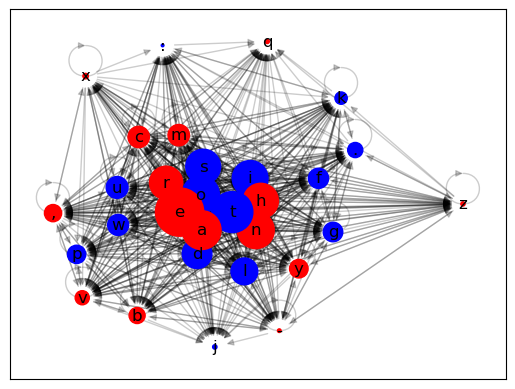

In [9]:
pos = nx.spring_layout(G)  # Positioning the nodes with a spring layout
#nx.draw(G, pos)
nx.draw_networkx_nodes(G, pos, node_size=pi1*10000, node_color=color_map)
nx.draw_networkx_edges(G, pos, alpha=.2)
nx.draw_networkx_labels(G, pos, labels={i: x for i, x in enumerate(dc)})
plt.show()

In [10]:
def get_target_avoids(pos, key_array):
    positive1 = key_array[pos[0]+1, pos[1]-1, 1]
    positive2 = key_array[pos[0]+1, pos[1]+1, 1]
    negatives = [int(key_array[pos[0]+1, pos[1], 1])]
    
    if positive1 == '?' and positive2 != '?':
        positives = [int(positive2)]
    elif positive1 != '?' and positive2 == '?':
        positives = [int(positive1)]
    elif positive1 != '?' and positive2 != '?':
        positives = [int(positive1), int(positive2)]
    else:
        positives = []

    return positives, negatives

def calculate_score(G, candidates, target_nodes, avoid_node):
    scores = {}
    for letter in candidates:
        to_targets = sum(G[letter][node]['weight'] for node in target_nodes if G.has_edge(letter, node))
        from_targets = sum(G[node][letter]['weight'] for node in target_nodes if G.has_edge(node, letter))
        to_avoid = sum(G[letter][avoid_node]['weight'] for avoid_node in avoid_node if G.has_edge(letter, avoid_node))
        from_avoid = sum(G[avoid_node][letter]['weight'] for avoid_node in avoid_node if G.has_edge(avoid_node, letter))
        
        score = (to_targets + from_targets) - (to_avoid + from_avoid)
        scores[letter] = score
    
    return scores

In [11]:
def tbd(G, dc, subgraph_nodes):
    shape = (3, 5, 2)
    labels={i: x for i, x in enumerate(dc)}
    key_array = np.full(shape, '?', dtype='<U2') 

    prio = [(1, 3), (1, 2), (1, 1), (1, 0)]
    # = [(1, 6), (1, 7), (1, 8), (1, 9)]

    placed = set()

    # fill in the fixed most important letters
    for i in range(4):
        x, y = prio[i]
        node = subgraph_nodes[i]
        placed.add(node)
        key_array[x, y, :] = [labels[node], node]
    
    positions = [(0, 3), (0, 2), (0, 1), (0, 0)]

    for position in positions:
        positives, negatives = get_target_avoids(position, key_array)
        #print(positives, negatives)
        candidates = [node for node in subgraph_nodes if node not in placed]
        scores = calculate_score(G.subgraph(subgraph_nodes), candidates, positives, negatives)
        nodes = sorted(scores, key= lambda k: scores.get(k), reverse=True)
        #print(nodes[:2])

        x, y = position
        node = nodes[0]
        placed.add(node)
        key_array[x, y, :] = [labels[node], node]

        node = nodes[1]
        placed.add(node)
        key_array[x+2, y, :] = [labels[node], node]

    # TODO: last 3 positions
    
    return key_array

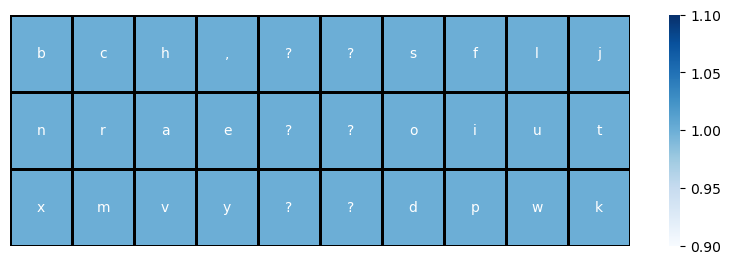

In [12]:
metric = "Average"
heat = np.ones((3, 5))
left = data.loc[t1]
left = nm.sort_by_column(left, metric)
nodes = list(left.index)
key_array1 = tbd(G, dc, nodes)

right = data.loc[t2]
right = nm.sort_by_column(right, metric)
nodes = list(right.index)
key_array2 = tbd(G, dc, nodes)

test = np.concatenate((key_array1, np.fliplr(key_array2)), axis=1)
test2 = np.concatenate((heat, heat), axis=1)
vis.visualize_keyboard_seaborn(test[:, :, 0], test2)